In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
data = h5py.File('/gdrive/My Drive/AIML/Neural Network/project/SVHN_single_grey1.h5')

In [0]:
list(data)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
print("Testing data :", data['X_test'].shape)

Testing data : (18000, 32, 32)


In [0]:
print("Training data :", data['X_train'].shape)

Training data : (42000, 32, 32)


In [0]:
print("Validation data :", data['X_val'].shape)

Validation data : (60000, 32, 32)


In [0]:
print("Y Test:", data['y_test'].shape)

Y Test: (18000,)


In [0]:
data['y_train'][:]

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt

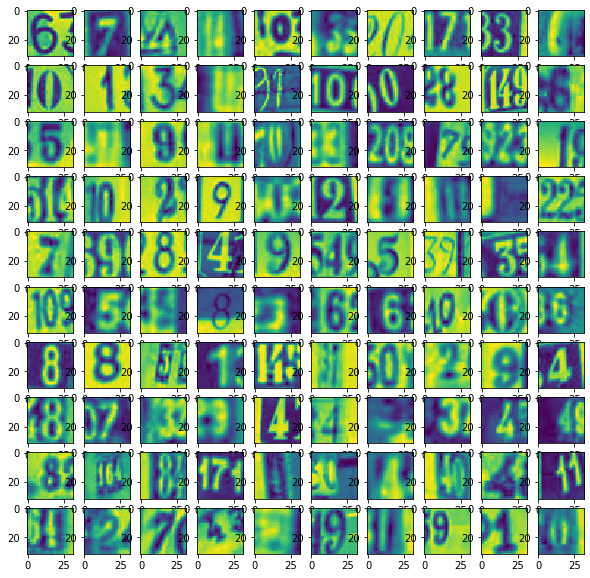

In [0]:
fig = plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows + 1):
    img = data['X_train'][i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()

# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier

In [0]:
x_train = data['X_train'][:].reshape(data['X_train'].shape[0], -1)
print(x_train.shape)

(42000, 1024)


In [0]:
x_train

array([[ 33.0704,  30.2601,  26.852 , ...,  49.6682,  50.853 ,  53.0377],
       [ 86.9591,  87.0685,  88.3735, ...,  75.2206,  76.6396,  79.2865],
       [123.125 , 125.8581, 122.0757, ...,  93.9349, 104.7875, 113.8252],
       ...,
       [154.094 , 155.8057, 156.8164, ..., 135.1328, 136.6596, 137.6595],
       [207.4954, 208.4953, 213.0218, ..., 214.1357, 212.1359, 209.1362],
       [ 95.0784,  96.0783, 100.0779, ..., 138.0803, 140.493 , 140.493 ]],
      dtype=float32)

In [0]:
x_test = data['X_test'][:].reshape(data['X_test'].shape[0], -1)
print(x_test.shape)

(18000, 1024)


In [0]:
x_test

array([[ 40.558 ,  46.7917,  48.9764, ..., 110.0169, 111.2017, 114.1906],
       [115.1609, 114.161 , 113.1611, ...,  42.1388,  48.2522,  53.2517],
       [133.255 , 134.7279, 136.3148, ..., 128.1801, 127.8103, 128.2124],
       ...,
       [166.1898, 164.7169, 162.8311, ..., 162.902 , 162.788 , 162.674 ],
       [137.5778, 136.6919, 134.8061, ..., 144.7881, 142.7883, 141.7884],
       [ 30.182 ,  30.182 ,  30.182 , ...,  35.0891,  34.6762,  34.0892]],
      dtype=float32)

In [233]:
y_train = data['y_train'][:]
print(y_train.shape)

(42000,)


In [234]:
y_test = data['y_test'][:]
print(y_test.shape)

(18000,)


In [0]:
class NN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist = self.tr_x[test_sample][each_value]
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [0]:
knn_model = NN()

In [0]:
knn_model.train(x_train, y_train)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
model = KNeighborsClassifier(n_neighbors=1)

In [0]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(x_test)

In [136]:
y_pred

array([6, 7, 3, ..., 1, 5, 4], dtype=uint8)

**Print the classification metric report**

In [0]:
from sklearn import metrics

In [138]:
print('KNN Accuracy : ', metrics.accuracy_score(y_test, y_pred))

KNN Accuracy :  0.45916666666666667


In [140]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000



**Implement and apply a deep neural network classifier including (feedforward
neural network, RELU activations)** bold text

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))

In [0]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

**Batch Normalization**

In [0]:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

**Understand and be able to implement (vectorized) backpropagation (cost
stochastic gradient descent, cross entropy loss, cost functions)**

In [0]:
sgd = tf.keras.optimizers.SGD()

In [0]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [245]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
batch_normalization_9 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 10)               

In [0]:
y_train = tf.keras.utils.to_categorical(data['y_train'][:], num_classes=10)
y_test = tf.keras.utils.to_categorical(data['y_test'][:], num_classes=10)

In [0]:
x_train = data['X_train'][:]
x_test = data['X_test'][:]

In [249]:
#Train the model
model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          epochs=40,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/40
42000/42000 [==============================] - 6s 134us/sample - loss: 1.8571 - acc: 0.3733 - val_loss: 1.9059 - val_acc: 0.4067
Epoch 2/40
42000/42000 [==============================] - 5s 127us/sample - loss: 1.4241 - acc: 0.5372 - val_loss: 1.6452 - val_acc: 0.5049
Epoch 3/40
42000/42000 [==============================] - 5s 123us/sample - loss: 1.2847 - acc: 0.5913 - val_loss: 1.3081 - val_acc: 0.6373
Epoch 4/40
42000/42000 [==============================] - 5s 122us/sample - loss: 1.3038 - acc: 0.5785 - val_loss: 2.0635 - val_acc: 0.4206
Epoch 5/40
42000/42000 [==============================] - 5s 119us/sample - loss: 1.2973 - acc: 0.5883 - val_loss: 1.6284 - val_acc: 0.5929
Epoch 6/40
42000/42000 [==============================] - 5s 123us/sample - loss: 1.2578 - acc: 0.5990 - val_loss: 2.1349 - val_acc: 0.4358
Epoch 7/40
42000/42000 [==============================] - 5s 120us/sample - loss: 1.1866 - acc: 0.6275 - val_l

**Understand the differences and trade-offs between traditional and NN
classifiers with the help of classification metrics**

In [250]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

18000/18000 [==============================] - 1s 44us/sample - loss: 1.1411 - acc: 0.7503
[1.1410695922109815, 0.7503333]


In [0]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

In [252]:
y_pred.shape

(18000,)

In [253]:
print(metrics.classification_report(data['y_test'][:], y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1814
           1       0.77      0.79      0.78      1828
           2       0.80      0.77      0.78      1803
           3       0.76      0.66      0.70      1719
           4       0.82      0.79      0.80      1812
           5       0.62      0.80      0.70      1768
           6       0.75      0.74      0.74      1832
           7       0.81      0.78      0.80      1808
           8       0.72      0.71      0.71      1812
           9       0.73      0.71      0.72      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



We are getting accuracy of around 75% with deep neural network as compared to accuracy of 45% in KNN. From above report, we can see NN is working great as compared to KNN. KNN can be easily folled by irrelevant